In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.linear_model import LinearRegression
from transformers import CLIPVisionModel, CLIPProcessor, CLIPModel
from PIL import Image
import glob

In [62]:
# download pretrained model
vis_model = CLIPVisionModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.2.self_attn.out_proj.weight', 'text_model.encoder.layers.5.self_attn.out_proj.bias', 'text_model.encoder.layers.0.layer_norm2.weight', 'text_model.encoder.layers.4.layer_norm1.weight', 'text_model.encoder.layers.6.self_attn.v_proj.weight', 'text_model.encoder.layers.1.self_attn.out_proj.bias', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.4.self_attn.out_proj.weight', 'text_model.encoder.layers.4.self_attn.k_proj.bias', 'text_model.encoder.layers.2.layer_norm2.bias', 'text_model.encoder.layers.5.self_attn.k_proj.weight', 'text_model.encoder.layers.10.mlp.fc1.weight', 'text_model.encoder.layers.7.self_attn.out_proj.weight', 'text_model.encoder.layers.9.mlp.fc2.bias', 'text_model.encoder.layers.0.self_attn.q_proj.bias', 'text_model.encoder.layers.10.self_attn.q_proj.bias', 'text_model.encoder.layers.9.self_attn.v_p

In [52]:
img_path = "data/test_imgs/"
imgs = glob.glob(img_path + "*.jpg")
imgs = [Image.open(img) for img in imgs]
texts = ["a photo of a cat", "a photo of a dog", "a photo of a person", "a photo of a diver", "a phot of two divers", "a photo of three divers", "a photo of a monky", "a photo of two monkeys", "a photo of three monkeys"]

In [53]:
input = processor(images=imgs, return_tensors="pt", padding=True)

In [54]:
output = vis_model(**input, output_attentions=True, output_hidden_states=True)

CLIPVisionModel(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1024)
    )
    (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0): CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
  

In [59]:
output.hidden_states

(tensor([[[ 0.0347, -0.0400, -0.1694,  ...,  0.3224, -0.1506, -0.0191],
          [-0.2276, -0.0481,  0.1073,  ...,  0.4068, -0.1317, -0.0112],
          [-0.2015, -0.0481, -0.1461,  ...,  0.3711, -0.1290, -0.0116],
          ...,
          [ 0.0592, -0.0467,  0.1463,  ..., -0.0985, -0.1483, -0.0157],
          [ 0.1050, -0.0471,  0.1692,  ..., -0.2202, -0.1486, -0.0161],
          [ 0.1769, -0.0471,  0.1139,  ..., -0.0724, -0.1523, -0.0167]],
 
         [[ 0.0347, -0.0400, -0.1694,  ...,  0.3224, -0.1506, -0.0191],
          [ 0.2154, -0.0446, -0.1894,  ...,  0.2888, -0.1429, -0.0135],
          [-0.2494, -0.0418,  0.0141,  ...,  0.2579, -0.1439, -0.0105],
          ...,
          [ 0.2606, -0.0444, -0.0606,  ..., -0.0613, -0.1368, -0.0152],
          [-0.2003, -0.0502,  0.5547,  ..., -0.2101, -0.1480, -0.0157],
          [ 0.5122, -0.0446,  0.1077,  ..., -0.0317, -0.1402, -0.0084]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[ 6.8149e-02,  8.0320e-02, -7.3721e-02,  ..., 

In [ ]:
# Load challenge rois
"""Loads the challenge rois from the .npy files"""
# Load the ROI classes mapping dictionaries
roi_mapping_files = ['mapping_prf-visualrois.npy', 'mapping_floc-bodies.npy',
    'mapping_floc-faces.npy', 'mapping_floc-places.npy',
    'mapping_floc-words.npy', 'mapping_streams.npy']
roi_name_maps = []
for r in roi_mapping_files:
    roi_name_maps.append(np.load(f"data/features/roi_masks/{r}", allow_pickle=True).item())

# Load the ROI brain surface maps
lh_challenge_roi_files = ['lh.prf-visualrois_challenge_space.npy',
    'lh.floc-bodies_challenge_space.npy', 'lh.floc-faces_challenge_space.npy',
    'lh.floc-places_challenge_space.npy', 'lh.floc-words_challenge_space.npy',
    'lh.streams_challenge_space.npy']
rh_challenge_roi_files = ['rh.prf-visualrois_challenge_space.npy',
    'rh.floc-bodies_challenge_space.npy', 'rh.floc-faces_challenge_space.npy',
    'rh.floc-places_challenge_space.npy', 'rh.floc-words_challenge_space.npy',
    'rh.streams_challenge_space.npy']
lh_challenge_rois = []
rh_challenge_rois = []
for r in range(len(lh_challenge_roi_files)):
    lh_challenge_rois.append(np.load(f"data/features/roi_masks/{lh_challenge_roi_files[r]}"))
    rh_challenge_rois.append(np.load(f"data/features/roi_masks/{rh_challenge_roi_files[r]}"))

In [17]:
# load data/features/1_Transformer Layer 7.npy
rf_l7_train = np.load('data/features/1_Transformer Layer 7.npy')
rf_l7_val = np.load('data/features/2_Transformer Layer 7.npy')
print(rf_l7_train.shape)
print(rf_l7_val.shape)

(984, 50, 768)
(159, 50, 768)


In [20]:
# load data/features/lh_training_fmri.npy
lh_fmri = np.load('data/features/lh_training_fmri.npy')
rh_fmri = np.load('data/features/rh_training_fmri.npy')
print(lh_fmri.shape)
print(rh_fmri.shape)

(9841, 19004)
(9841, 20544)


In [35]:
pca = PCA(n_components=500)
rf_l7_train_transf = pca.fit_transform(rf_l7_train.reshape(rf_l7_train.shape[0], -1))

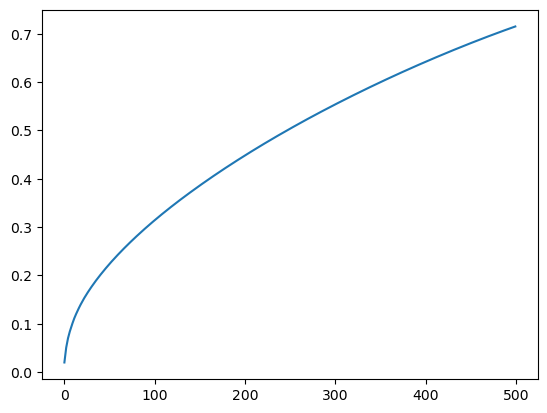

In [36]:
# plot pca explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [37]:
# transform val
rf_l7_val_transf = pca.transform(rf_l7_val.reshape(rf_l7_val.shape[0], -1))

In [38]:
# fit linear regression
lh_lr = LinearRegression().fit(rf_l7_train_transf, lh_fmri_train)
rh_lr = LinearRegression().fit(rf_l7_train_transf, rh_fmri_train)

In [39]:
# predict validation 
lh_fmri_val_pred = lh_lr.predict(rf_l7_val_transf)
rh_fmri_val_pred = rh_lr.predict(rf_l7_val_transf)

In [40]:
# calculate voxelwise correlation
lh_correlation = np.zeros(lh_fmri_val_pred.shape[1])
for i in range(lh_fmri_val_pred.shape[1]):
    lh_correlation[i] = np.corrcoef(lh_fmri_val[:, i], lh_fmri_val_pred[:, i])[0, 1]
rh_correlation = np.zeros(rh_fmri_val_pred.shape[1])
for i in range(rh_fmri_val_pred.shape[1]):
    rh_correlation[i] = np.corrcoef(rh_fmri_val[:, i], rh_fmri_val_pred[:, i])[0, 1]



In [41]:
# calculate median correlations per roi

lh_challange_rois = lh_challenge_rois
rh_challange_rois = rh_challenge_rois
roi_names = []
lh_roi_correlation = []
rh_roi_correlation = []
for r1 in range(len(lh_challange_rois)):
    for r2 in roi_name_maps[r1].items():
        if r2[0] != 0: # zeros indicate to vertices falling outside the ROI of interest
            roi_names.append(r2[1])
            lh_roi_idx = np.where(lh_challange_rois[r1] == r2[0])[0]
            rh_roi_idx = np.where(rh_challange_rois[r1] == r2[0])[0]
            lh_roi_correlation.append(lh_correlation[lh_roi_idx])
            rh_roi_correlation.append(rh_correlation[rh_roi_idx])
roi_names.append('All vertices')
lh_roi_correlation.append(lh_correlation)
rh_roi_correlation.append(rh_correlation)
lh_median_roi_correlation = [np.median(lh_roi_correlation[r])
    for r in range(len(lh_roi_correlation))]
rh_median_roi_correlation = [np.median(rh_roi_correlation[r])
    for r in range(len(rh_roi_correlation))]

c:\Users\LukeKorthals\Desktop\Python Repositories\algonauts-2023\.conda\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LukeKorthals\Desktop\Python Repositories\algonauts-2023\.conda\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


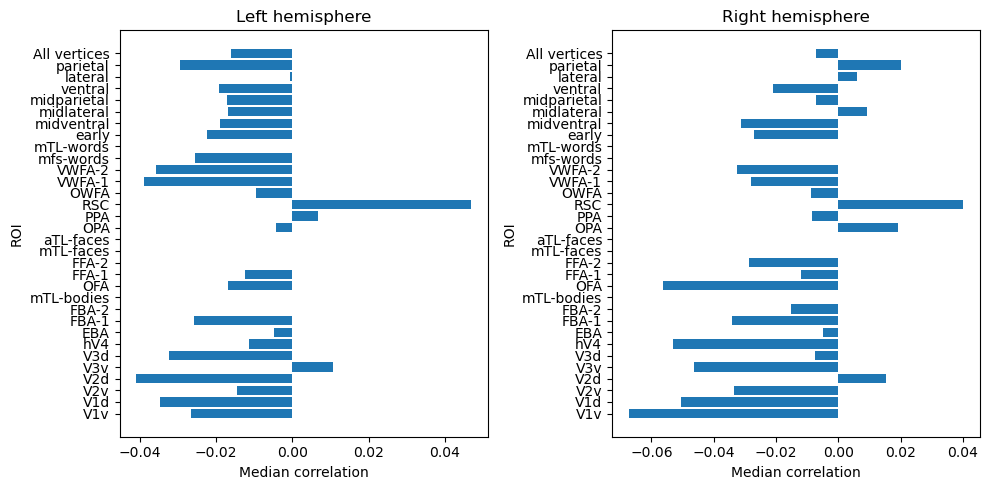

In [42]:
# bar plot of median correlation for each voxel
# top plot left hemisphere
# bottom plot right hemisphere

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].barh(roi_names, lh_median_roi_correlation)
ax[0].set_xlabel('Median correlation')
ax[0].set_ylabel('ROI')
ax[0].set_title('Left hemisphere')
ax[1].barh(roi_names, rh_median_roi_correlation)
ax[1].set_xlabel('Median correlation')
ax[1].set_ylabel('ROI')
ax[1].set_title('Right hemisphere')
plt.tight_layout()
plt.show()